In [1]:
from lab1_proto import enframe
from lab1_proto import preemp
from lab1_proto import windowing
from lab1_proto import powerSpectrum
import numpy as np
import matplotlib.pyplot as plt

In [2]:

winlen = 400
winshift = 200
data = np.load('data/lab1_example.npz')['example'].item()
frames = enframe(data['samples'], winlen=winlen, winshift=winshift)
pre_emph = preemp(frames, p=0.97)
windowed = windowing(pre_emph)

In [3]:
tmp = powerSpectrum(windowed, nfft=512)

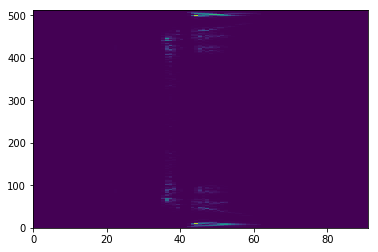

In [4]:
plt.pcolormesh(tmp.T)

In [5]:
tmp.shape

(91, 512)

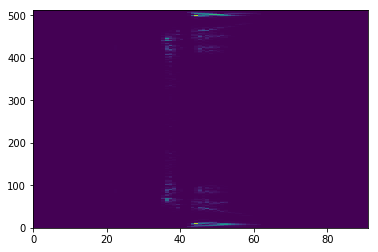

In [6]:
plt.pcolormesh(data['spec'].T)

In [7]:
np.sum(data['spec'] - tmp)

0.0

In [8]:
from lab1_tools import trfbank

In [9]:
filter_ = trfbank(data['samplingrate'], 512)

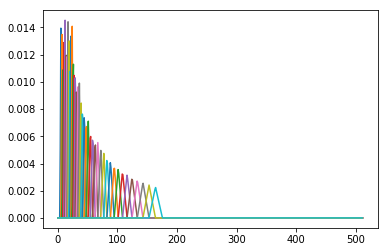

In [10]:
for i in range(filter_.shape[0]):
    plt.plot(filter_[i, :])

In [11]:
filter_.T.shape

(512, 40)

In [12]:
data['spec'].shape

(91, 512)

In [13]:
data['mspec'].shape

(91, 40)

In [14]:
mat = np.log(data['spec'].dot(filter_.T))

In [15]:
mat.shape

(91, 40)

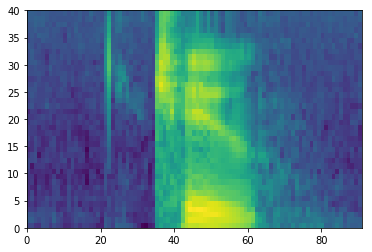

In [16]:
plt.pcolormesh(mat.T)

In [17]:
np.sum(mat - data['mspec'])

0.0

In [18]:
from lab1_proto import logMelSpectrum
mat2 = logMelSpectrum(data['spec'], data['samplingrate'])

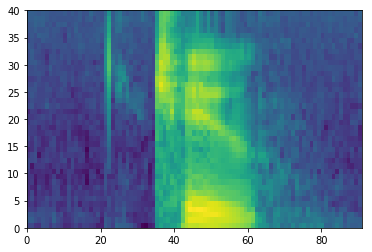

In [19]:
plt.pcolormesh(mat2.T)

In [20]:
mat2 - data['mspec']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
import scipy
scipy.__version__

'1.2.1'

In [22]:
from lab1_proto import cepstrum

In [25]:
mfcc = cepstrum(data['mspec'], nceps=13)

In [26]:
mfcc.shape

(91, 13)

In [28]:
data['mfcc'].shape

(91, 13)

In [47]:
from scipy import fftpack
def cepstrum(input_, nceps):
    """
    Calulates Cepstral coefficients from mel spectrum applying Discrete Cosine Transform

    Args:
        input: array of log outputs of Mel scale filterbank [N x nmelfilters] where N is the
               number of frames and nmelfilters the length of the filterbank
        nceps: number of output cepstral coefficients
    Output:
        array of Cepstral coefficients [N x nceps]
    Note: you can use the function dct from scipy.fftpack.realtransforms
    """
    # Lecture notes match only type II cosine transform
    ret = fftpack.dct(input_, type=3, axis=1, norm='ortho')[:,1:nceps+1]
    return ret

In [48]:
mfcc = cepstrum(data['mspec'], nceps=13)

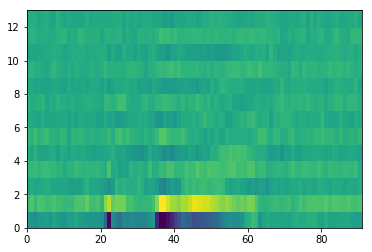

In [51]:
plt.pcolormesh(mfcc.T)

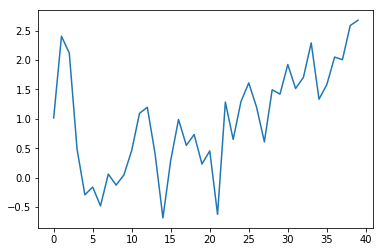

In [52]:
plt.plot(data['mspec'][0,:])

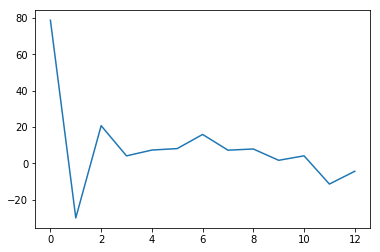

In [59]:
plt.plot(fftpack.dct(data['mspec'][0,:])[:13])

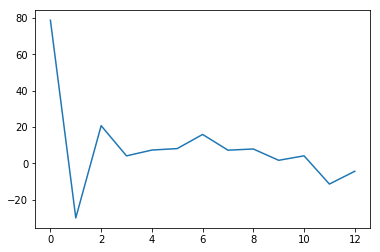

In [54]:
plt.plot(data['mfcc'][0, :])

In [63]:
mat2 = fftpack.dct(data['mspec'], axis=1)[:, :13]

In [64]:
mat2 - data['mfcc']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
from scipy.fftpack.realtransforms import dct